In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# GDP = BKT
df = pd.read_csv('GDP_FINLAND.csv')

In [8]:
df.head()

,time,geo,unit,s_adj,na_item,value
0,1975Q1,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
1,1975Q2,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
2,1975Q3,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
3,1975Q4,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN
4,1976Q1,Finlande,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,NaN


### Remove unneeded meta-variables

In [9]:
df = df.drop(['geo', 'unit', 's_adj', 'na_item'], axis=1)

In [10]:
df

,time,value
0,1975Q1,NaN
1,1975Q2,NaN
2,1975Q3,NaN
3,1975Q4,NaN
4,1976Q1,NaN
...,...,...
177,2019Q2,51513.0
178,2019Q3,51673.0
179,2019Q4,51498.0
180,2020Q1,50521.0


In [12]:
# We are missing years 1675 - 1989 and years after 2020 Q1
df = df.dropna()
df.tail()

,time,value
176,2019Q1,51093.0
177,2019Q2,51513.0
178,2019Q3,51673.0
179,2019Q4,51498.0
180,2020Q1,50521.0


### For pivot table, we need two time variables and one continous variable
#### Let's split time into year and quarter

In [13]:
df['year'] = df['time'].str.slice(0, 4).astype(int)
df['quarter'] = df['time'].str.slice(5, 6).astype(int)

C:\Users\jtsil\AppData\Local\Temp\ipykernel_25212\2761620078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time'].str.slice(0, 4).astype(int)
C:\Users\jtsil\AppData\Local\Temp\ipykernel_25212\2761620078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df['time'].str.slice(5, 6).astype(int)


In [15]:
df = df.drop('time', axis=1)

In [16]:
df.head()

,value,year,quarter
60,32134.0,1990,1
61,31690.0,1990,2
62,31022.0,1990,3
63,30837.0,1990,4
64,30223.0,1991,1


### Now we have two time columns and one numeric column
#### Next step => convert DataFrame into pivot table

In [17]:
# Define index and columns => time variables for example months and years
# Values => visualize numeric values
df_pivot = df.pivot_table(index='quarter', columns='year', values='value')

In [18]:
df_pivot

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
quarter,,,,,,,,,,,,,,,,,,,,,
1,32134.0,30223.0,29013.0,28307.0,28826.0,30232.0,31480.0,32607.0,35714.0,36783.0,...,48268.0,48191.0,46926.0,46909.0,46726.0,47997.0,49677.0,50806.0,51093.0,50521.0
2,31690.0,29873.0,28692.0,28256.0,29082.0,31048.0,31626.0,33378.0,36145.0,37036.0,...,48195.0,47463.0,47125.0,46884.0,47227.0,48397.0,49866.0,50732.0,51513.0,NaN
3,31022.0,29262.0,28446.0,28429.0,29735.0,30904.0,31999.0,34284.0,35988.0,37372.0,...,48212.0,47360.0,47306.0,47113.0,47310.0,48720.0,50127.0,50859.0,51673.0,NaN
4,30837.0,28923.0,28237.0,28638.0,30487.0,30933.0,32526.0,35385.0,35210.0,38128.0,...,48261.0,47223.0,47164.0,46928.0,47594.0,48959.0,50747.0,51051.0,51498.0,NaN


<Axes: >

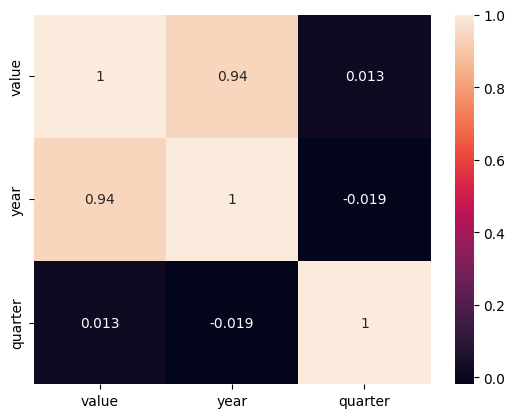

In [20]:
# Check correlations matrix with seaborn
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

<Axes: xlabel='year', ylabel='quarter'>

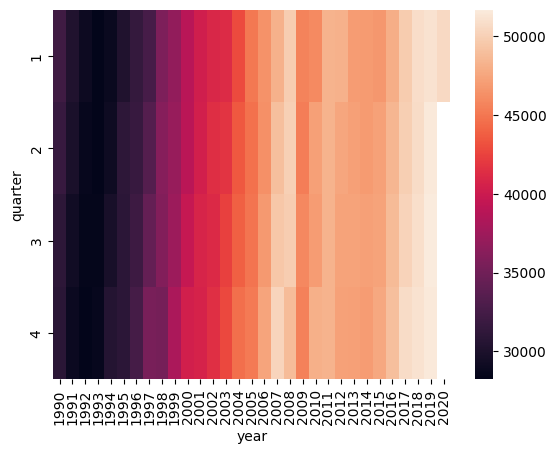

In [21]:
# visualize pivot table
sns.heatmap(df_pivot, xticklabels=True, yticklabels=True)